In [1]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn


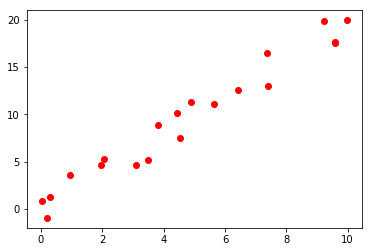

In [2]:
x_train = np.array([[v] for v in np.random.random(20)*10], dtype=np.float32)

noise = np.array([[v] for v in np.random.random(20)*4-2], dtype=np.float32)
y_train = 2*x_train + noise

plt.plot(x_train, y_train, 'ro', label='Original data')

In [5]:
## ----- TODO : Utiliser Pytorch pour trouver une regression linéaire pour les données ----- ##

# Un réseau avec une seule couche linéaire (nn.Linear) sera suffisant
# Vous pouvez utiliser la MSELoss (nn.MSELoss) comme fonction de loss
class NeuralNet(nn.Module):
    def __init__(self, input_size, target_size):
        super(NeuralNet, self).__init__()
        self.linear_regression = nn.Linear(input_size, target_size)  
    
    def forward(self, x):
        return self.linear_regression(x)

# Hyper-parameters 
input_size = 1
target_size = 1
num_epochs = 5000
batch_size = 100
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, target_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Train the model
for epoch in range(num_epochs):    
   # Forward pass
    outputs = model(torch.tensor(x_train))
    loss = criterion(outputs, torch.tensor(y_train))
    # print(loss)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("done")
    ## ----------------------------------------------------------------------------------------- ##

done


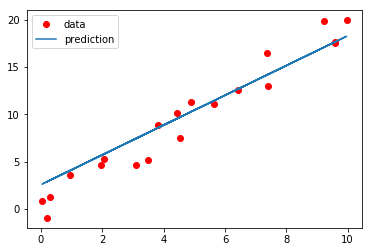

In [10]:
y_hat = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train, 'ro', label="data")
plt.plot(x_train, y_hat, label="prediction")
plt.legend()
plt.show()